<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M1L4_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Transformation using Linear Algebra**

Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
# You don't need to understand these functions


def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    # plot lines parallel to the x axis
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    # plot  lines parallel to the y axis
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    return fig, ax

Matrix Transformation

In [ ]:
T0 = np.array([[1, 0], [0, 1]])
T1 = np.array([[1, 2], [-3, 4]])

data1 = np.array([5, 6])
data0 = np.matmul(T1, data1)

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [17  9]
Data in T1 =  [5 6]


Plotting

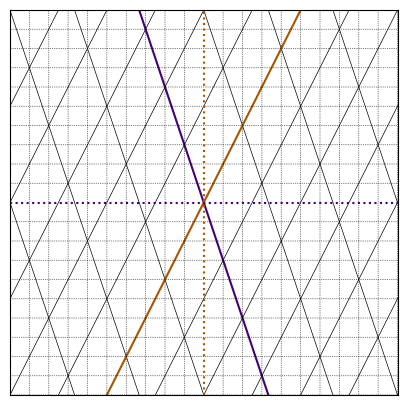

In [ ]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[17  9]
[17  9]


In [ ]:
A1 = np.array([3, 6])
B1 = np.array([2, -5])
C1 = np.array([1, -4])


A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)


def dist(a, b):

    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())

print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")

print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  11.045361017187261
Distance between B and C in T1 =  1.4142135623730951
Distance between A and C in T1 =  10.198039027185569

Distance between A and B in T0 =  47.01063709417264
Distance between B and C in T0 =  7.0710678118654755
Distance between A and C in T0 =  40.496913462633174


Transformations on MNIST

In [ ]:
def NN1(traindata, trainlabel, query):
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)


def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        # for every row, add up all the rows above it.
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole


def getHullPixels(img):
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull


def minus(a, b):
    return a & ~b


def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [ ]:
# Loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull = np.array([getHullPixels(i).sum() for i in test_X])
train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

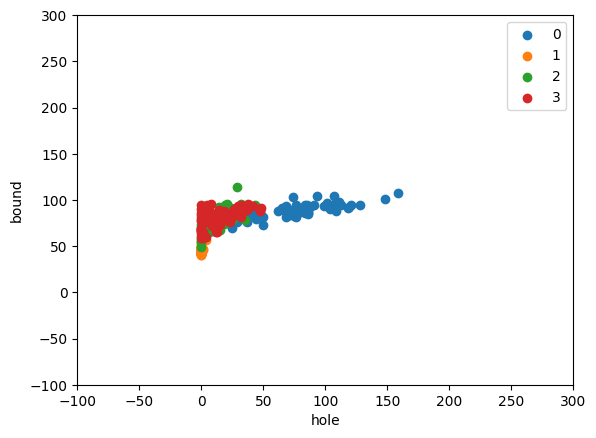

In [ ]:
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [ ]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 76.19047619047619 % for 4 classes


In [ ]:
transform = np.array([[0.5, -0.5], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
test_feats_t = np.matmul(test_feats, transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


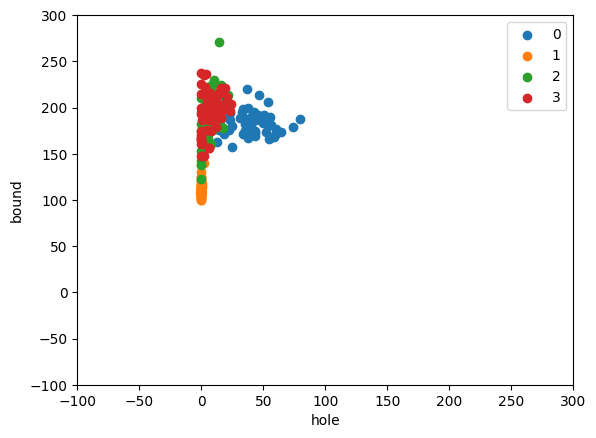

In [ ]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [ ]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 80.95238095238095 % for 4 classes


# **Questions Set 1**



1. Experiment with different transformation matrices and check the accuracy.

In [ ]:
from scipy.ndimage import affine_transform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0  # Normalize the data to [0, 1]
test_X = test_X / 255.0

nclasses = 4  # We will use 4 classes (digits 0 to 3) for this experiment

# Filter the dataset to only include the first nclasses
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# Subset the dataset to speed up the process
train_X = train_X[::100].copy()  # Take every 100th training sample
train_y = train_y[::100].copy()
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

# Define a list of transformation matrices (e.g., identity, rotation, scaling)
transformation_matrices = [
    np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),  # Identity matrix (no transformation)
    np.array([[0.9, 0.1, 0], [-0.1, 0.9, 0], [0, 0, 1]]),  # Small rotation
    np.array([[1.2, 0, 0], [0, 1.2, 0], [0, 0, 1]]),  # Scaling up
    np.array([[0.8, 0, 0], [0, 0.8, 0], [0, 0, 1]]),  # Scaling down
    np.array([[1, 0.2, 0], [0.2, 1, 0], [0, 0, 1]])  # Shear transformation
]

# Function to apply an affine transformation to the dataset
def apply_transformation(data, matrix):
    transformed_data = np.array([affine_transform(img, matrix[:2, :2], offset=matrix[:2, 2], output_shape=(28, 28)) for img in data])
    return transformed_data

# Feature extraction: Sum of pixels as a basic feature (can be replaced with more advanced features)
def extract_features(data):
    return np.sum(data, axis=(1, 2)) / (28 * 28)  # Normalize by the image size

# Iterate through each transformation matrix, apply it, extract features, and check accuracy
for i, matrix in enumerate(transformation_matrices):
    # Apply the transformation to both the training and test sets
    transformed_train_X = apply_transformation(train_X, matrix)
    transformed_test_X = apply_transformation(test_X, matrix)

    # Extract features (sum of pixels here, but you could extract more sophisticated features)
    train_feats = extract_features(transformed_train_X).reshape(-1, 1)
    test_feats = extract_features(transformed_test_X).reshape(-1, 1)

    # Train a simple classifier (k-Nearest Neighbors) and evaluate its accuracy
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(train_feats, train_y)
    test_pred = knn.predict(test_feats)

    # Calculate accuracy
    acc = accuracy_score(test_y, test_pred)

    print(f"Accuracy with transformation {i} (matrix {matrix}): {acc * 100:.2f}%")

Accuracy with transformation 0 (matrix [[1 0 0]
 [0 1 0]
 [0 0 1]]): 54.76%
Accuracy with transformation 1 (matrix [[ 0.9  0.1  0. ]
 [-0.1  0.9  0. ]
 [ 0.   0.   1. ]]): 52.38%
Accuracy with transformation 2 (matrix [[1.2 0.  0. ]
 [0.  1.2 0. ]
 [0.  0.  1. ]]): 54.76%
Accuracy with transformation 3 (matrix [[0.8 0.  0. ]
 [0.  0.8 0. ]
 [0.  0.  1. ]]): 40.48%
Accuracy with transformation 4 (matrix [[1.  0.2 0. ]
 [0.2 1.  0. ]
 [0.  0.  1. ]]): 52.38%


2. Will the same transform used for these two features also work for other features?

In [ ]:
The same transformation used for two features, such as hole pixels and boundary pixels in the earlier example, may or may not work effectively for other features, depending on the nature of those features and how sensitive they are to geometric transformations.

# **Exercise 1**

Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the feature sets (hole, boundary, hull, and sum features)
features_train = {
    "hole_boundary": np.vstack((train_hole, train_bound)).transpose(),
    "hole_hull": np.vstack((train_hole, train_hull)).transpose(),
    "hole_sum": np.vstack((train_hole, train_sum)).transpose(),
    "boundary_hull": np.vstack((train_bound, train_hull)).transpose(),
    "boundary_sum": np.vstack((train_bound, train_sum)).transpose(),
    "hull_sum": np.vstack((train_hull, train_sum)).transpose()
}

features_test = {
    "hole_boundary": np.vstack((test_hole, test_bound)).transpose(),
    "hole_hull": np.vstack((test_hole, test_hull)).transpose(),
    "hole_sum": np.vstack((test_hole, test_sum)).transpose(),
    "boundary_hull": np.vstack((test_bound, test_hull)).transpose(),
    "boundary_sum": np.vstack((test_bound, test_sum)).transpose(),
    "hull_sum": np.vstack((test_hull, test_sum)).transpose()
}

# Train and evaluate accuracy for each feature combination
for feature_name in features_train.keys():
    # Train a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(features_train[feature_name], train_y)

    # Make predictions on the test set
    test_pred = knn.predict(features_test[feature_name])

    # Calculate accuracy
    acc = accuracy_score(test_y, test_pred)

    # Print the results
    print(f"Accuracy with features {feature_name}: {acc * 100:.2f}%")


Accuracy with features hole_boundary: 76.19%
Accuracy with features hole_hull: 69.05%
Accuracy with features hole_sum: 71.43%
Accuracy with features boundary_hull: 69.05%
Accuracy with features boundary_sum: 64.29%
Accuracy with features hull_sum: 69.05%


# **Data Normalization**

In [ ]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

In [ ]:
# Loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

In [ ]:
# Feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull = np.array([getHullPixels(i).sum() for i in test_X])
train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

In [ ]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

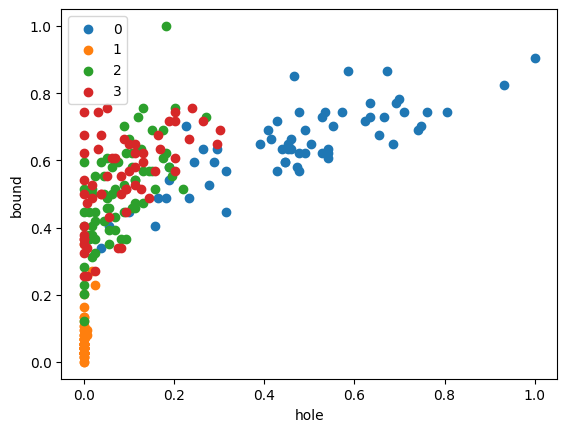

In [ ]:
fig, ax = plotData(train_feats_rescaled, train_y)

In [ ]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 80.95238095238095 %
